In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [2]:
# 시각화 선명도
%config InlineBackend.figure_format = 'retina' 
# 한글설정 축의 깨짐 방지
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# warining 경고 안보이게
warnings.filterwarnings(action='ignore')
# warining 경고 보이게
# warnings.filterwarnings(action='default')

In [4]:
movies_processing = pd.read_csv('../프로젝트csv/movies.csv')

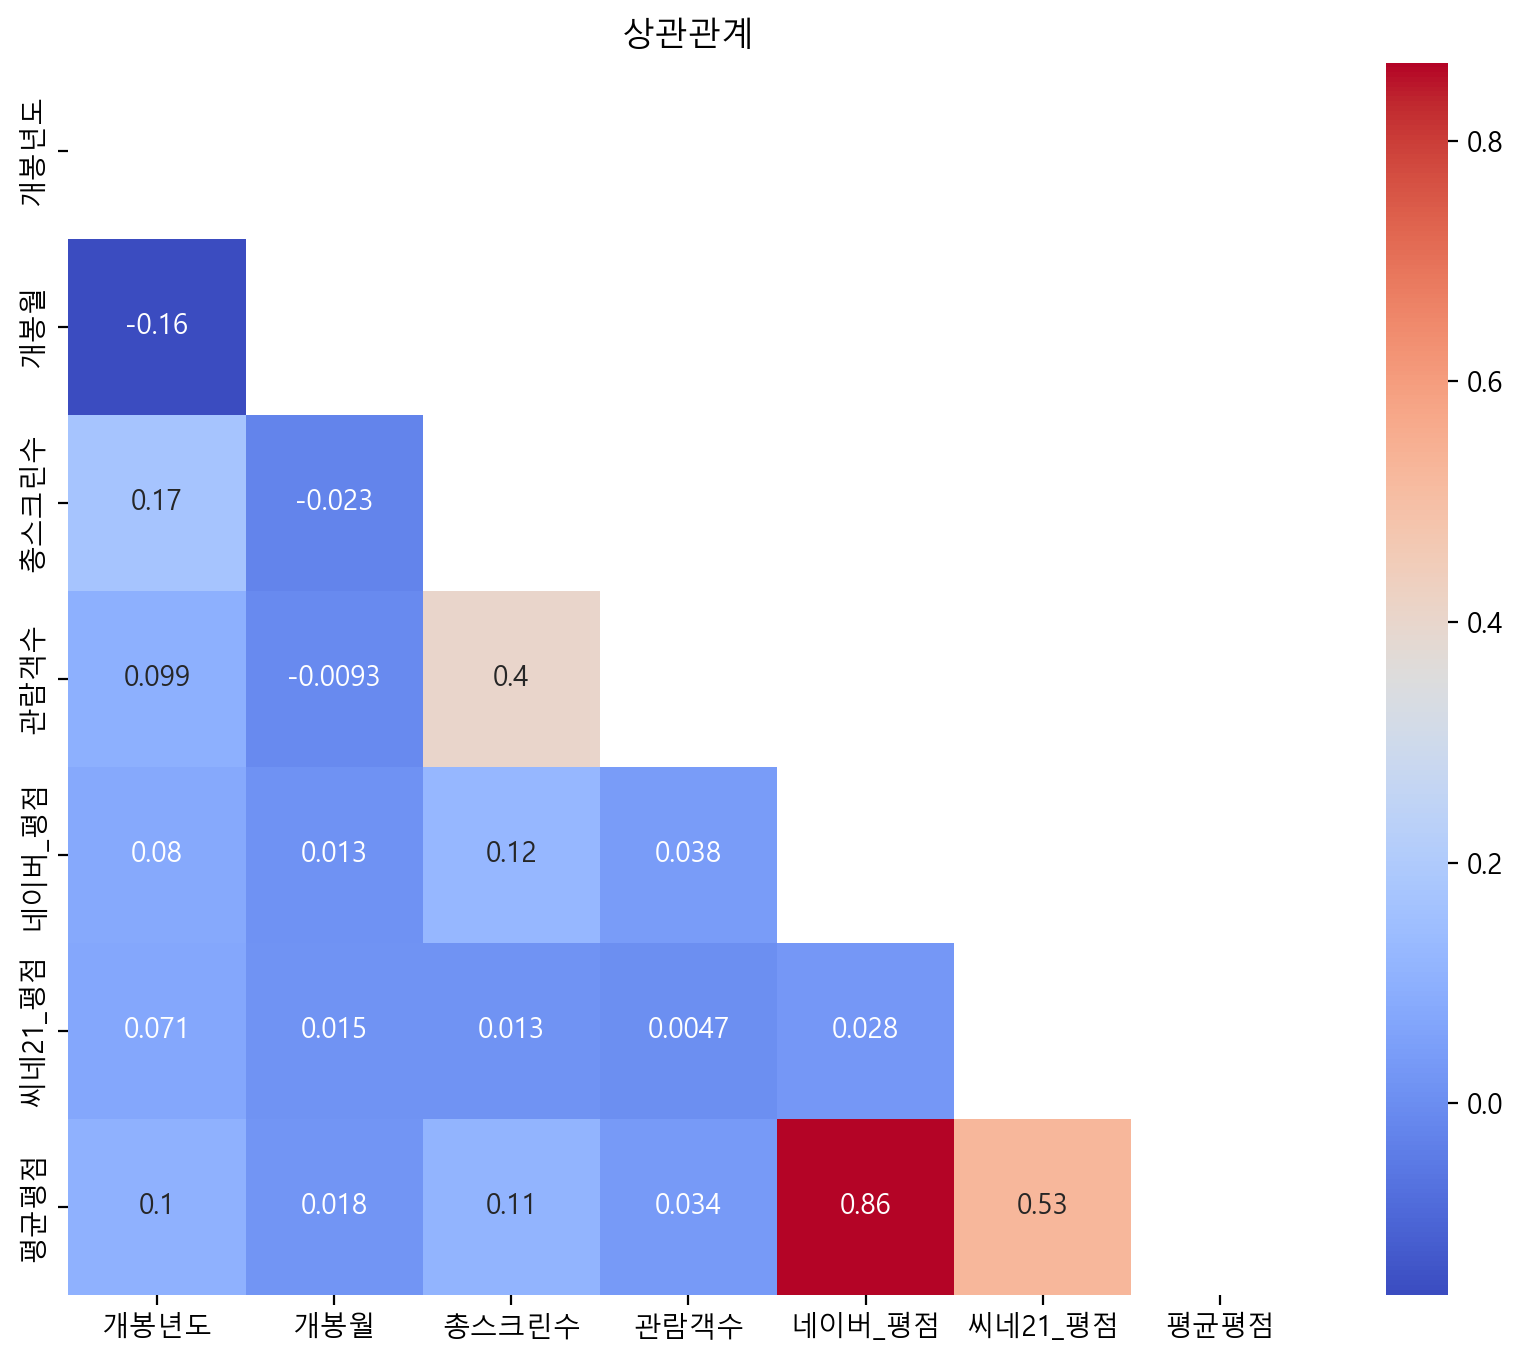

In [21]:
corr = movies_processing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

plt.title("상관관계")
plt.show()

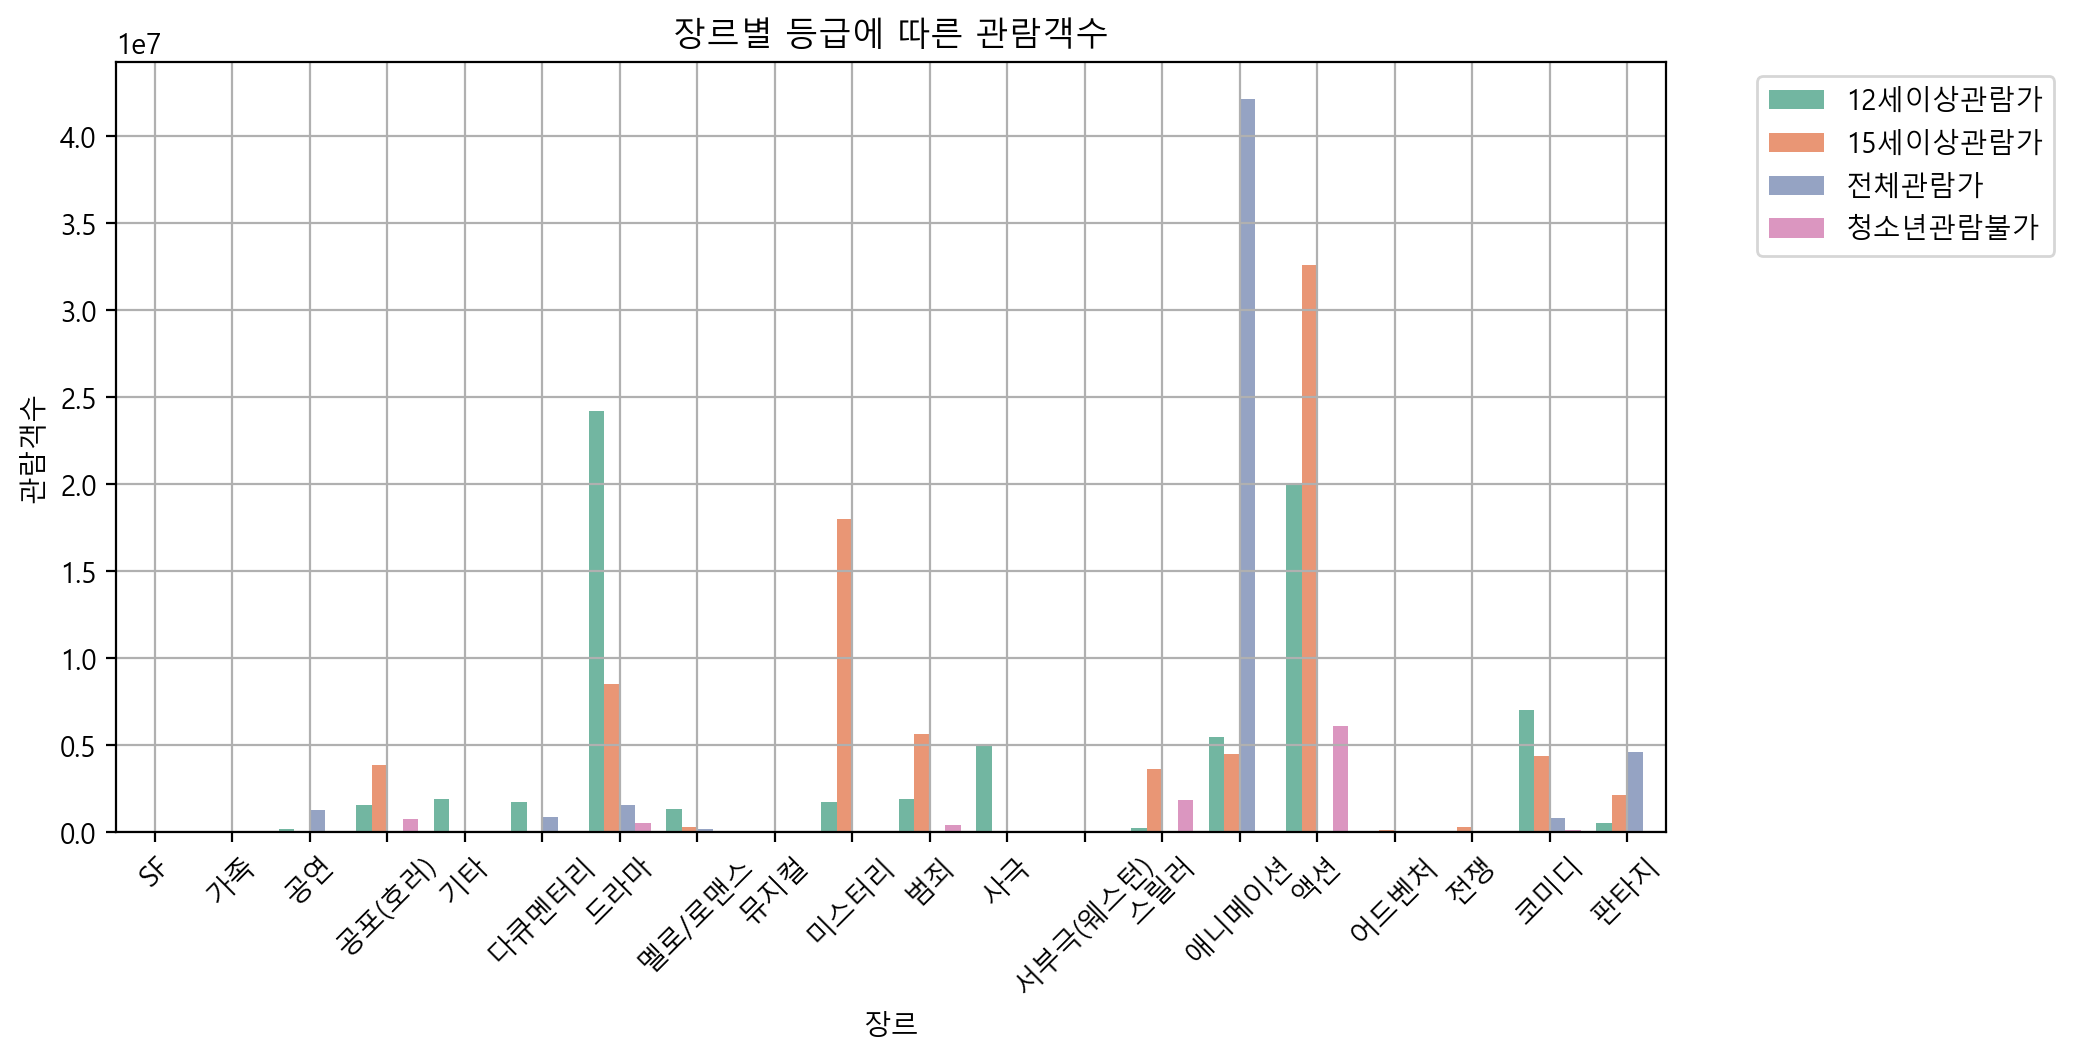

In [6]:
plt.figure(figsize=(10, 5))
mog = movies_processing.groupby(['장르', '등급'])['관람객수'].sum().reset_index()
sns.barplot(data=mog, x='장르', y='관람객수', hue='등급', palette='Set2')

plt.title('장르별 등급에 따른 관람객수')
plt.xlabel('장르')
plt.ylabel('관람객수')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

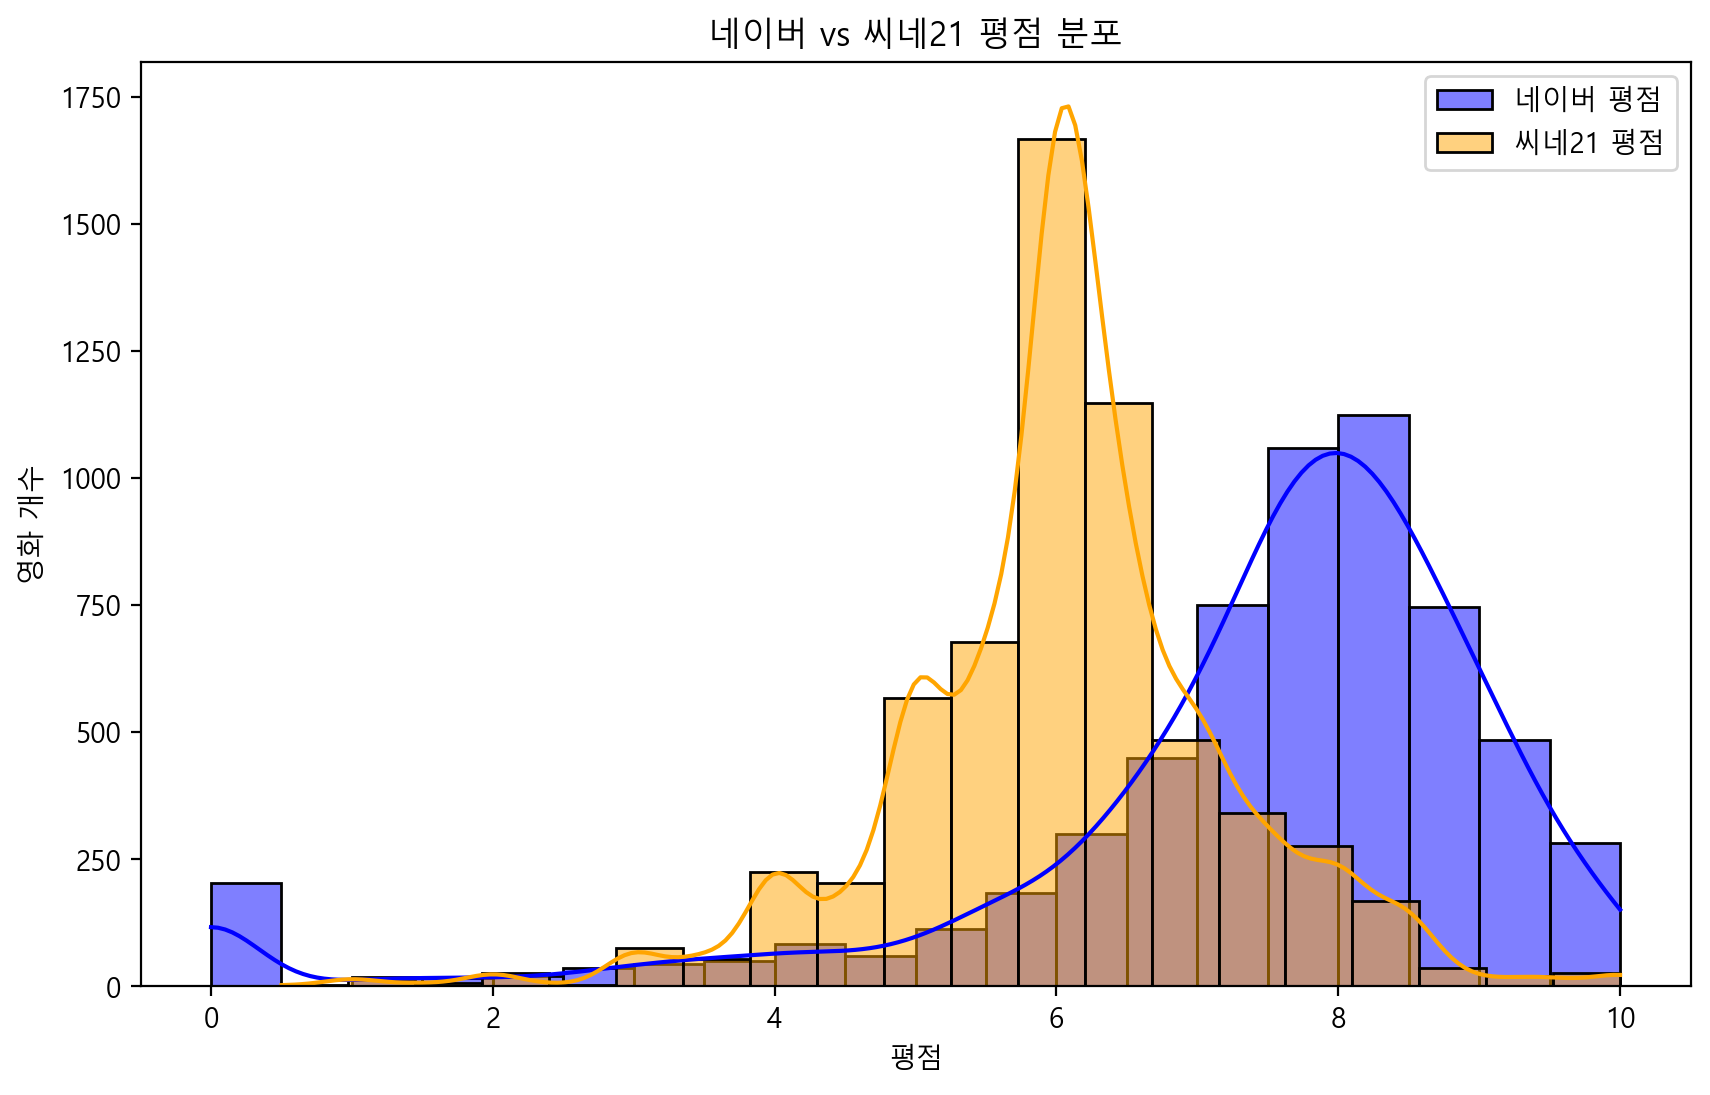

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_processing['네이버_평점'], kde=True, color='blue', label='네이버 평점', bins=20)
sns.histplot(movies_processing['씨네21_평점'], kde=True, color='orange', label='씨네21 평점', bins=20)

plt.title('네이버 vs 씨네21 평점 분포')
plt.xlabel('평점')
plt.ylabel('영화 개수')
plt.legend()
plt.show()

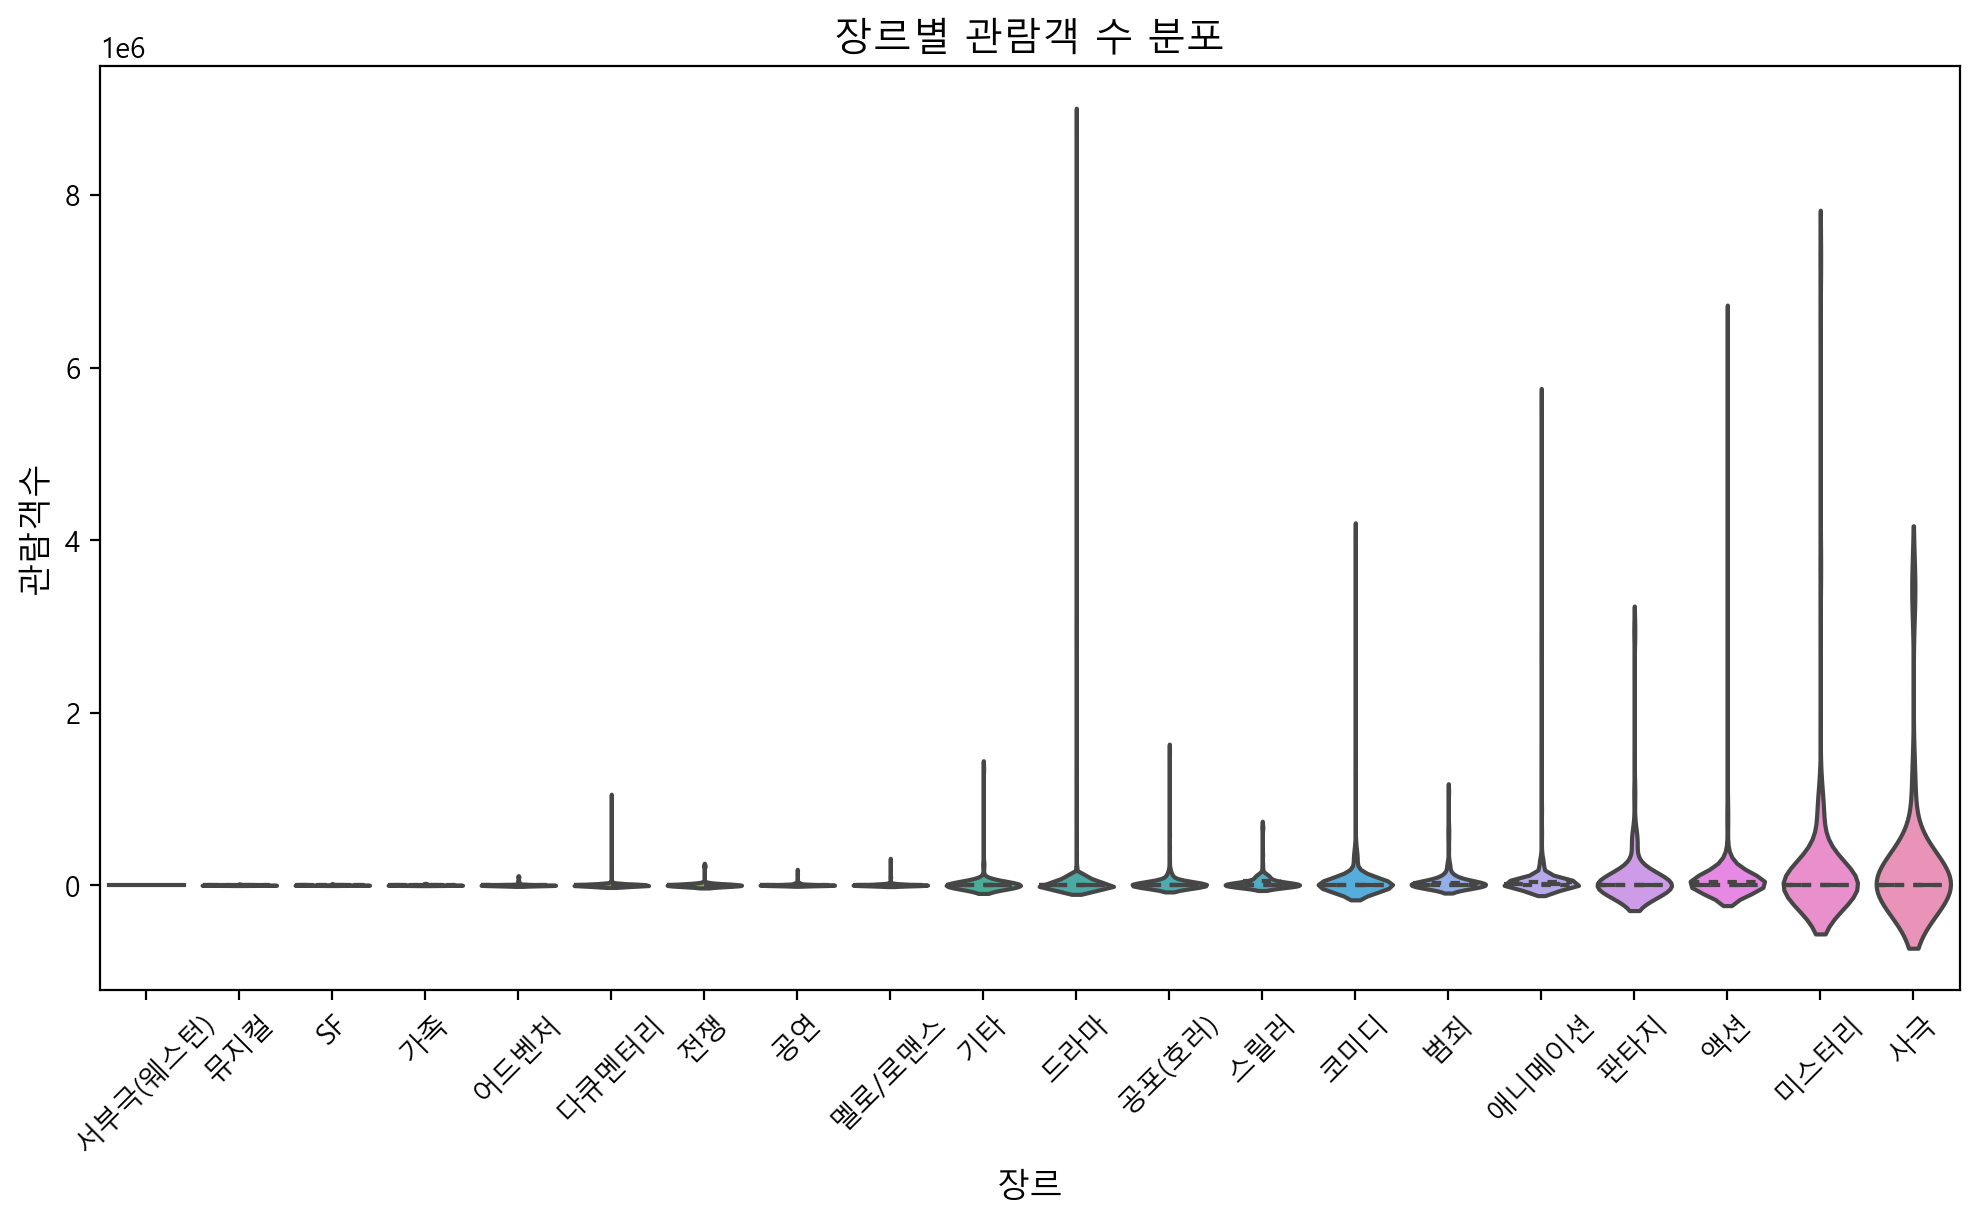

In [12]:
plt.figure(figsize=(12, 6))
sorted_data = movies_processing.groupby('장르')['관람객수'].mean().sort_values(ascending=True).reset_index()

sns.violinplot(data=movies_processing, x='장르', y='관람객수', order=sorted_data['장르'], scale='width', inner='quartile')
plt.title('장르별 관람객 수 분포', fontsize=14)
plt.xlabel('장르', fontsize=12)
plt.ylabel('관람객수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

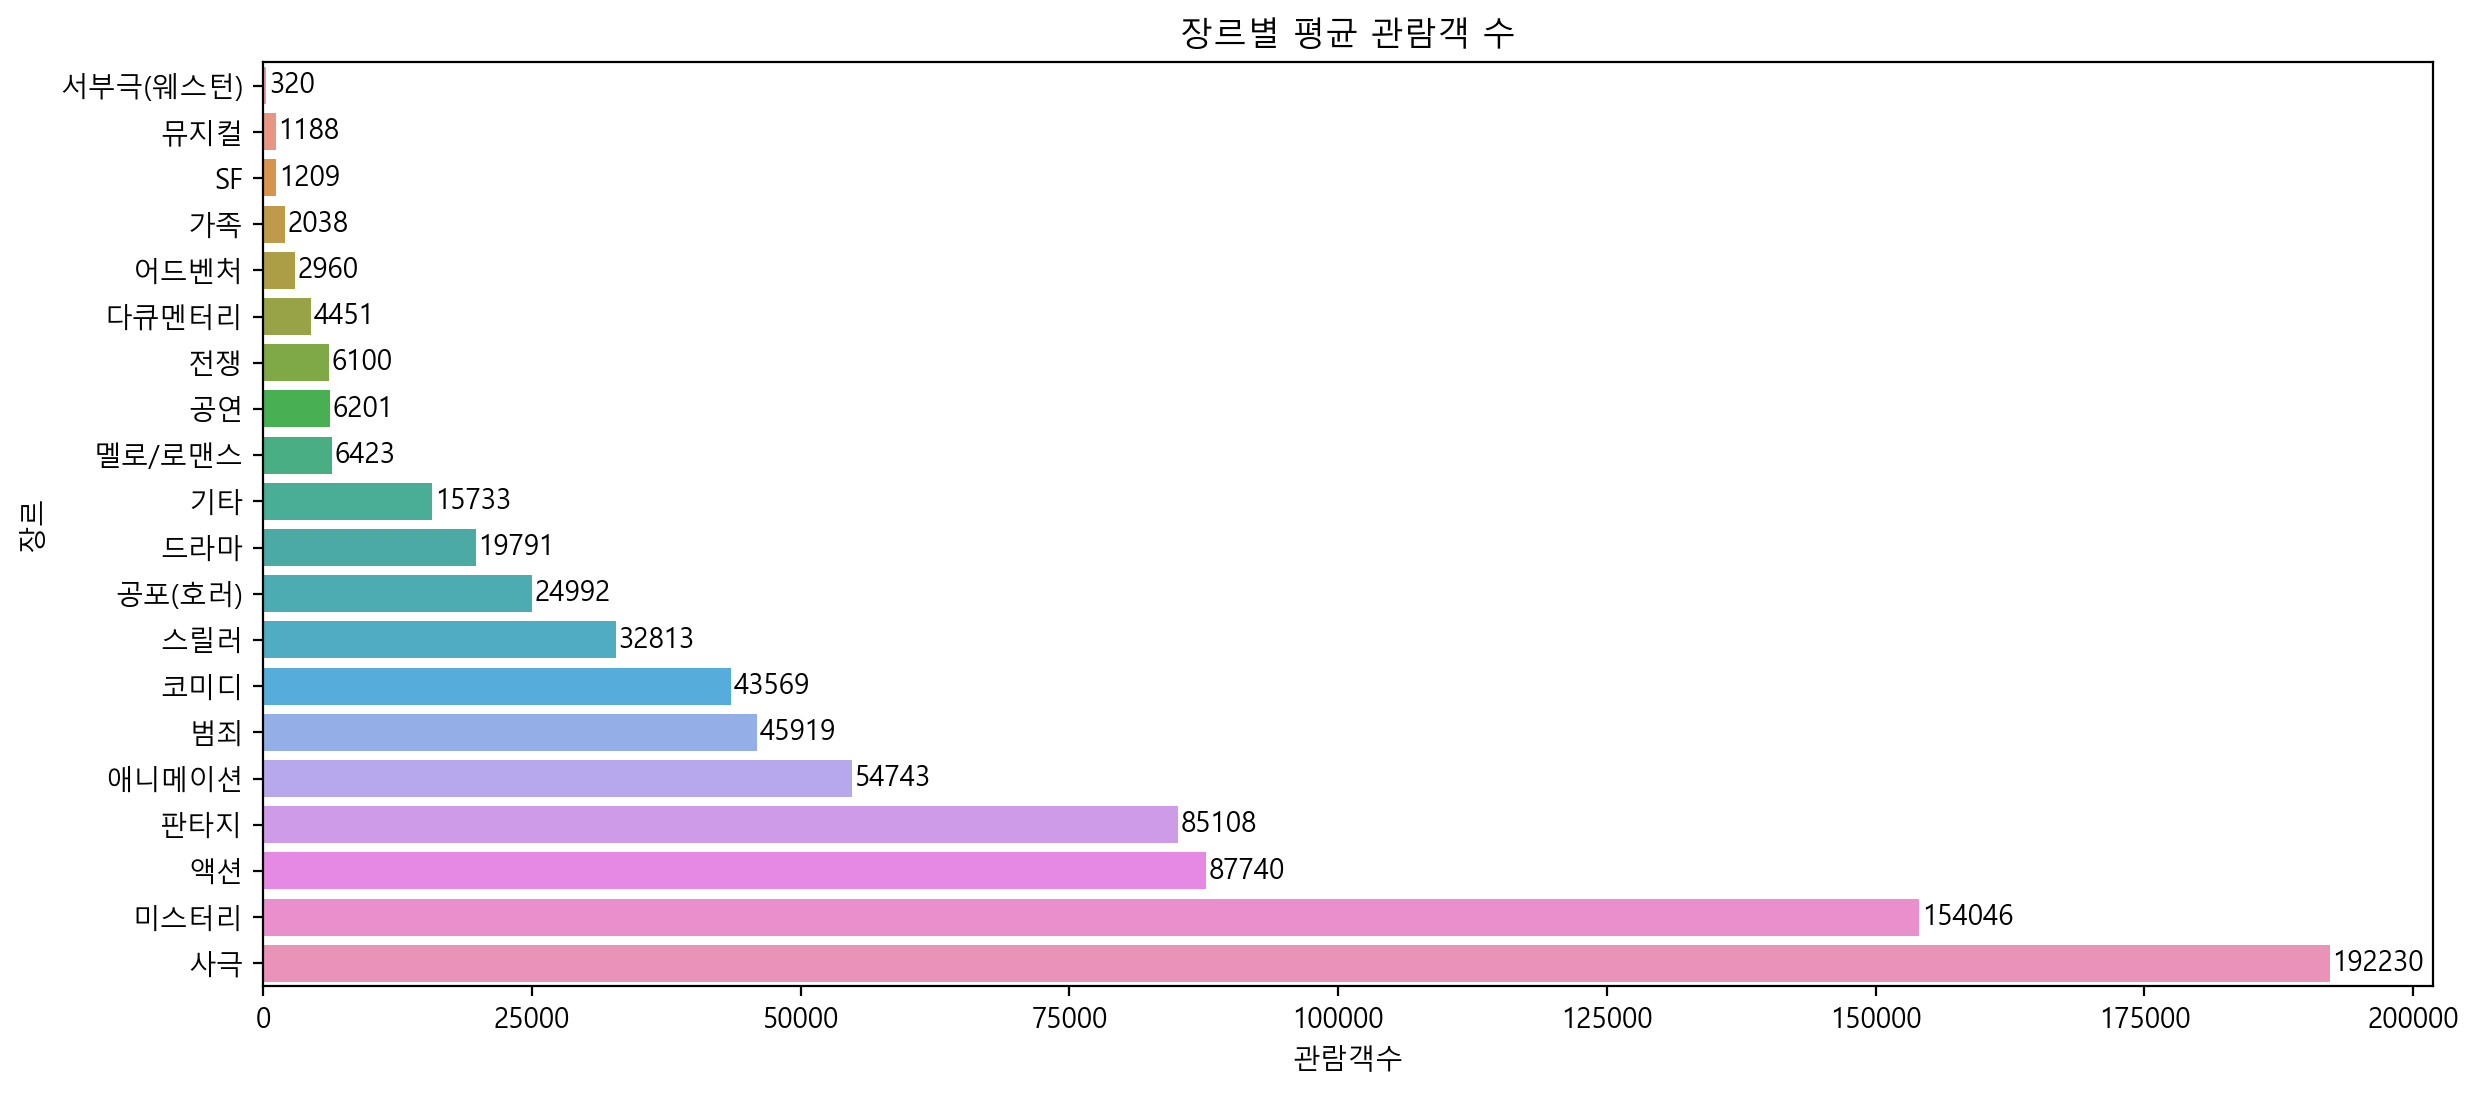

In [13]:
sorted_data = movies_processing.groupby(['장르'])['관람객수'].mean().reset_index()
sorted_data = sorted_data.sort_values(by='관람객수', ascending=True)

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=sorted_data, x='관람객수', y='장르', errorbar=None)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=1)

plt.title('장르별 평균 관람객 수')
plt.show()

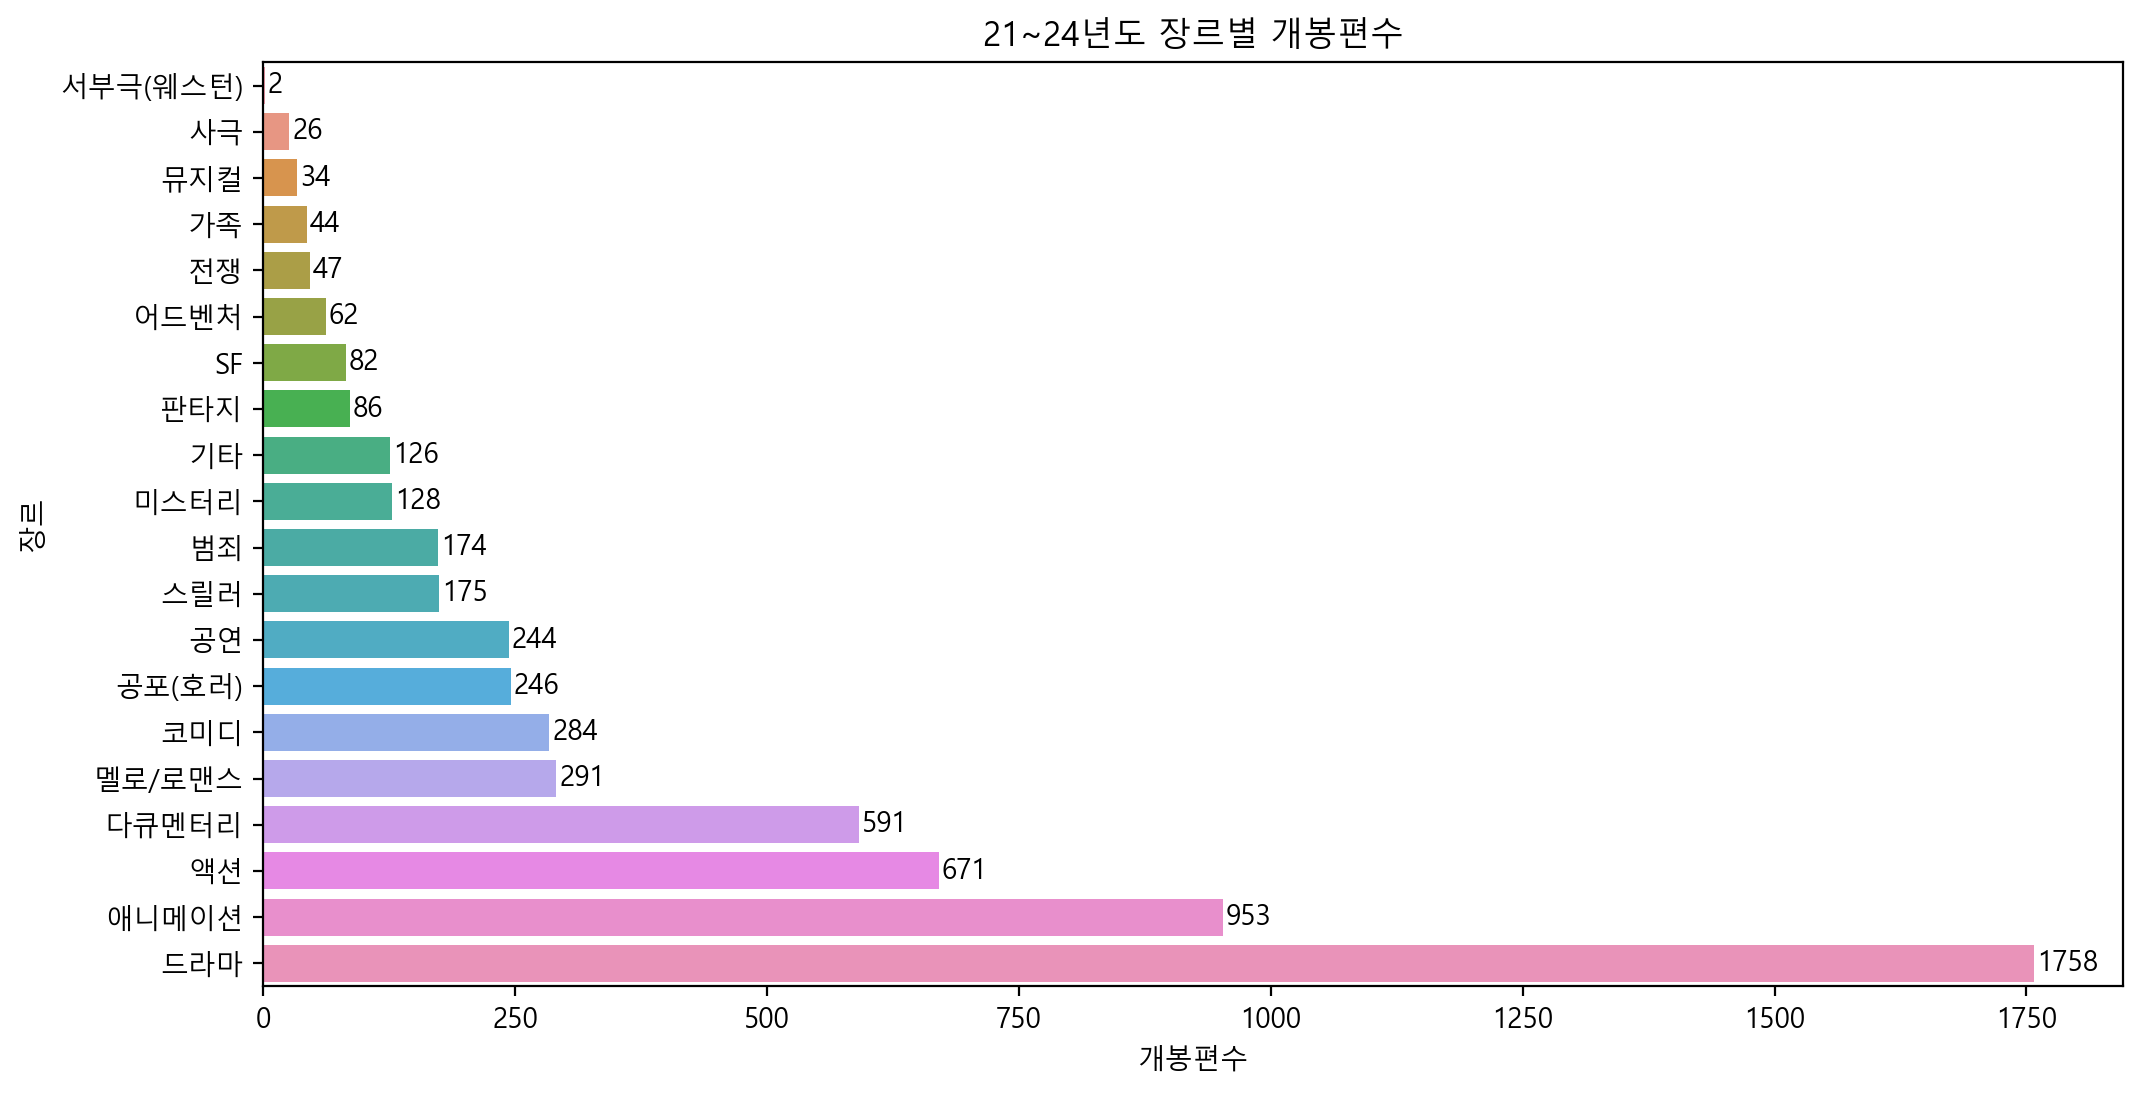

In [14]:
plt.figure(figsize=(12, 6))
sorted_data = movies_processing.groupby('장르')['개봉월'].count().sort_values(ascending=True).reset_index()
ax = sns.barplot(data=sorted_data, x='개봉월', y='장르', errorbar=None)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=1)
    
plt.title('21~24년도 장르별 개봉편수')
plt.xlabel('개봉편수')
plt.show()

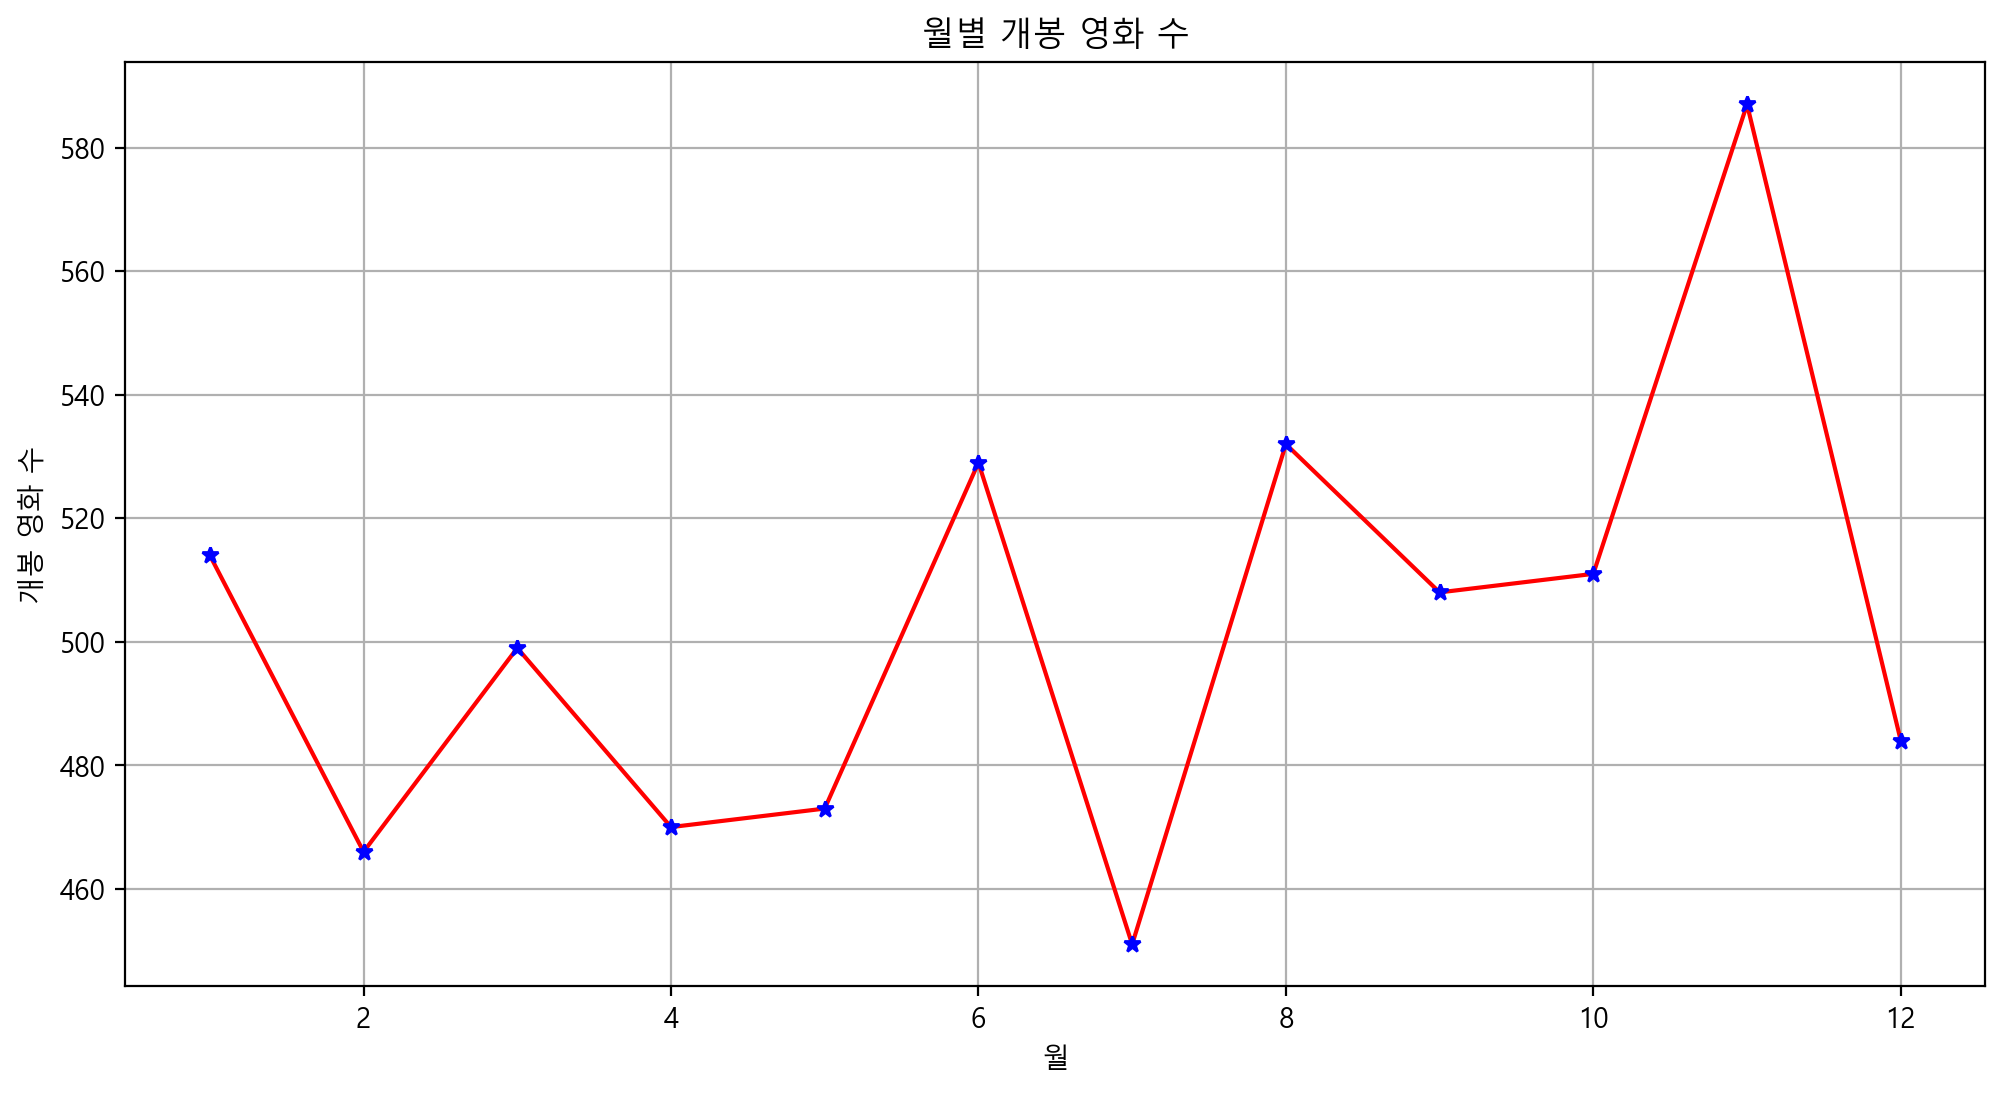

In [15]:
plt.figure(figsize=(12, 6))
plt.rc('font', family='Malgun Gothic')
ax = movies_processing.groupby('개봉월')['영화제목'].count().plot(kind='line', marker='*', markerfacecolor='blue', markeredgecolor='blue', color='red')
plt.title('월별 개봉 영화 수')
plt.xlabel('월')
plt.ylabel('개봉 영화 수')
plt.grid(True)
plt.show()

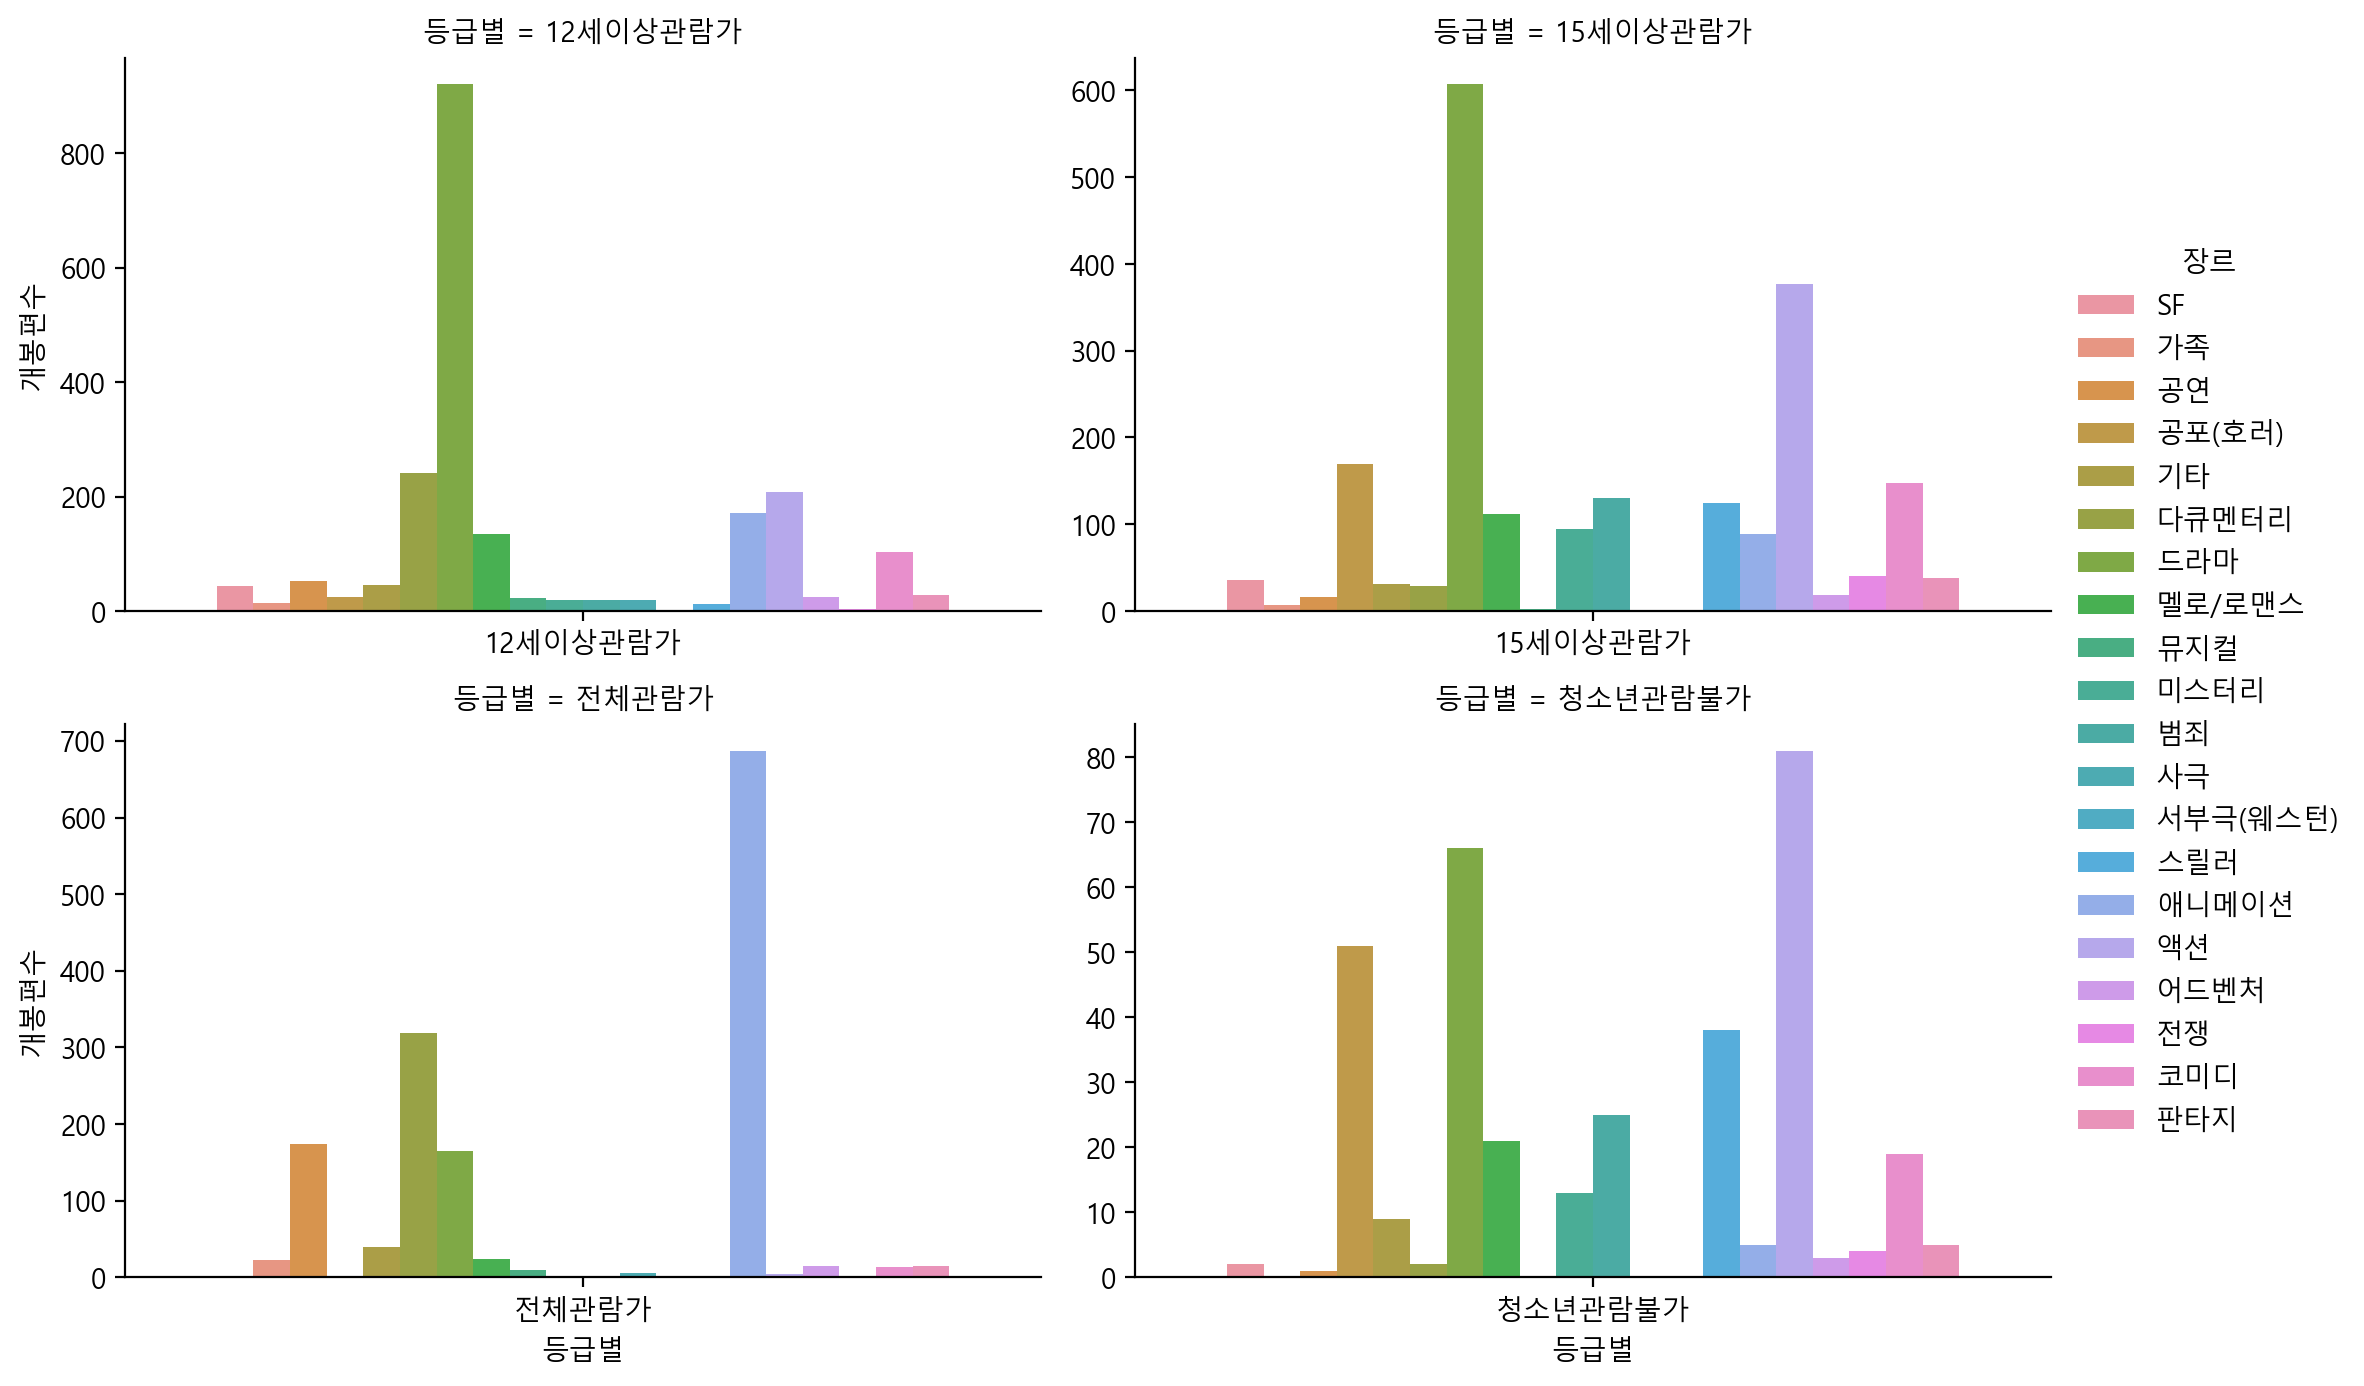

In [16]:
movie_grade = movies_processing.groupby(['장르','등급'])[['개봉월']].count().reset_index()
movie_grade = movie_grade.rename(columns={'장르':'장르',
                    '등급':'등급별',
                    '개봉월':'개봉편수'})
sns.catplot(data=movie_grade, 
            x='등급별', 
            y='개봉편수', 
            hue='장르', 
            kind='bar',
            col='등급별',
            sharey=False,
            sharex=False,
            height=3.5,
            aspect=1.5,
            col_wrap=2)
plt.show()

In [18]:
movies_processing.to_csv('../프로젝트csv/movies.csv', index=False, encoding='utf-8')